In [12]:
import pandas as pd

# Load the dataset from the provided Excel file
data = pd.read_excel("default of credit card clients.xls", header=1)  # Skipping the first row which is a description

# Display the first few rows of the dataset
data.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


ID: An identifier for each individual in the dataset.
LIMIT_BAL: The amount of given credit in NT dollar.
SEX: Gender of the individual (1 for male and 2 for female).
EDUCATION: The education level of the individual, categorized as graduate school (1), university (2), high school (3), and others (4).
MARRIAGE: Marital status of the individual, categorized as married (1), single (2), and others (3).
AGE: Age of the individual in years.
PAY_0 to PAY_6: History of past payment from September 2005 (PAY_0) to April 2005 (PAY_6).
BILL_AMT1 to BILL_AMT6: Amount of bill statement from September 2005 (BILL_AMT1) to April 2005 (BILL_AMT6) in NT dollar.
PAY_AMT1 to PAY_AMT6: Amount of previous payment from September 2005 (PAY_AMT1) to April 2005 (PAY_AMT6) in NT dollar.
default payment next month: Binary variable indicating default payment for the next month (1 for Yes and 0 for No).

In [13]:
# Descriptive statistics for numerical columns
numerical_stats = data.describe()

# Counts for categorical variables
sex_counts = data['SEX'].value_counts()
education_counts = data['EDUCATION'].value_counts()
marriage_counts = data['MARRIAGE'].value_counts()
default_payment_counts = data['default payment next month'].value_counts()

numerical_stats, sex_counts, education_counts, marriage_counts, default_payment_counts


(                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
 count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
 mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
 std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
 min        1.000000    10000.000000      1.000000      0.000000      0.000000   
 25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
 50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
 75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
 max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   
 
                 AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
 count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
 mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
 std        9.217904

#Descriptive Statistics:
**LIMIT_BAL:** The credit limit average is around 167,484 NT dollars with a minimum of 10,000 and a maximum of 1,000,000 NT dollars.

AGE: The average age of the customers in the dataset is approximately 35.5 years, with a minimum of 21 and a maximum of 79 years.

PAY_X: The payment history columns show a variety of values. For instance, for September 2005 (PAY_0), the mean is around -0.0167, suggesting that most people either pay duly or have a slight delay.

BILL_AMTX & PAY_AMTX: The bill statement and payment amounts show a wide range of values, with some large outliers (e.g., maximum payment in one month reaching up to 873,552 NT dollars).

#Categorical Variables Counts:
SEX: There are 18,112 females and 11,888 males in the dataset.

EDUCATION: Most of the customers are university graduates (14,030) or have attended graduate school (10,585). A smaller number have a high school education (4,917). Some entries are not within the described categories (0, 5, 6), suggesting potential data quality issues.

MARRIAGE: A majority of customers are single (15,964) or married (13,659). A few belong to the 'others' category (323), and some entries are marked as 0, which is again not described and might indicate data quality issues.
default payment next month: 6,636 customers defaulted the next month, while 23,364 did not.

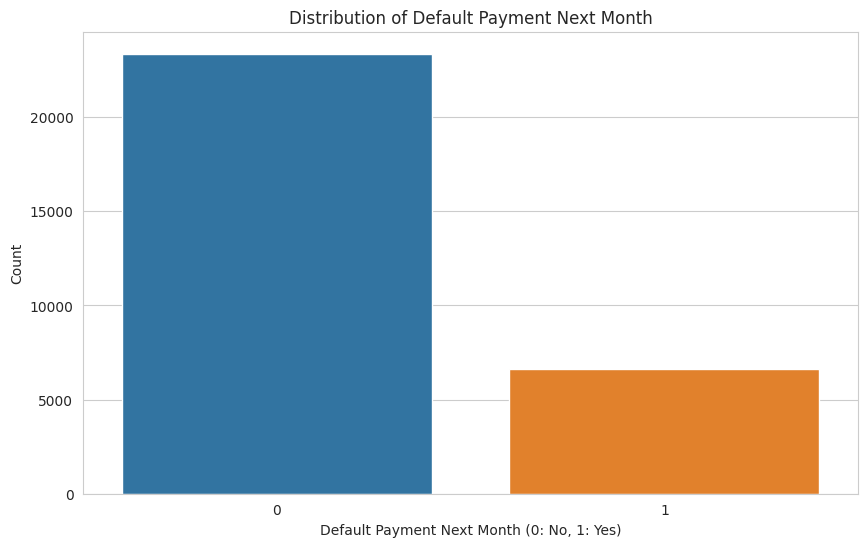

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of Seaborn
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(10,6))

# Plot the distribution of the target variable
sns.countplot(data=data, x='default payment next month')
plt.title('Distribution of Default Payment Next Month')
plt.xlabel('Default Payment Next Month (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


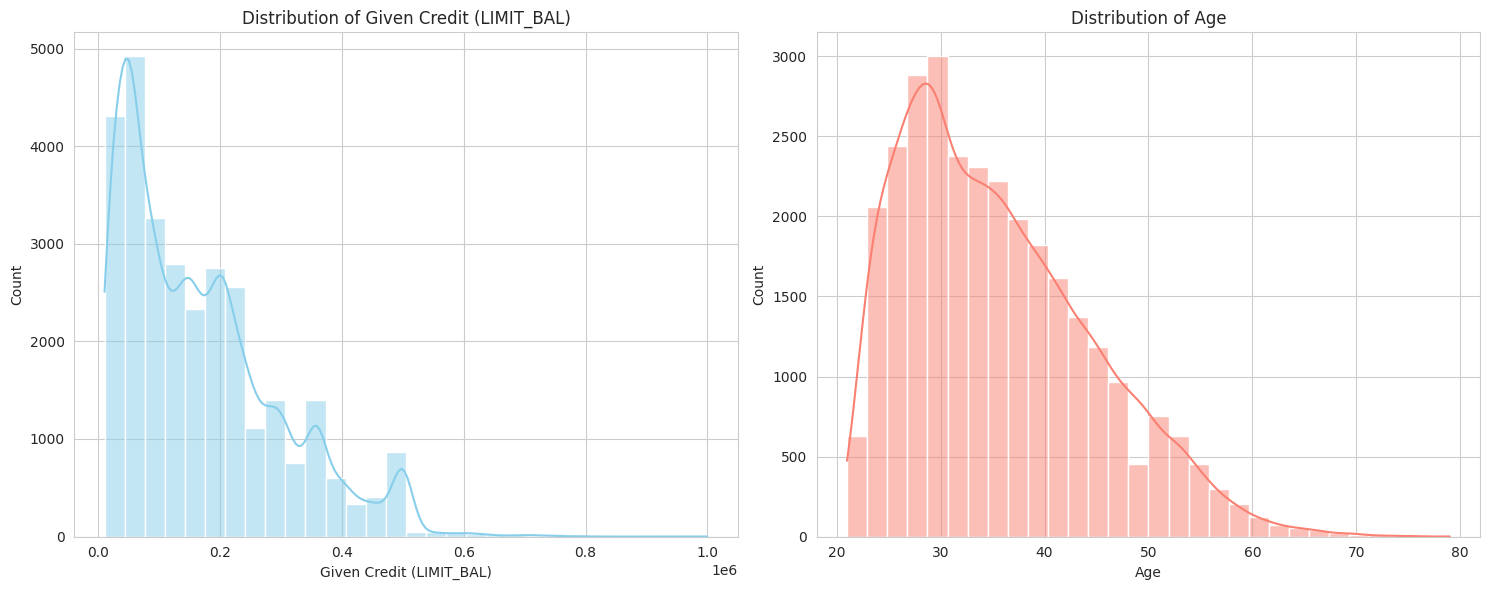

In [15]:
# Distribution of continuous variables: LIMIT_BAL and AGE

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Distribution of LIMIT_BAL
sns.histplot(data=data, x='LIMIT_BAL', kde=True, ax=ax[0], color='skyblue', bins=30)
ax[0].set_title('Distribution of Given Credit (LIMIT_BAL)')
ax[0].set_xlabel('Given Credit (LIMIT_BAL)')
ax[0].set_ylabel('Count')

# Distribution of AGE
sns.histplot(data=data, x='AGE', kde=True, ax=ax[1], color='salmon', bins=30)
ax[1].set_title('Distribution of Age')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


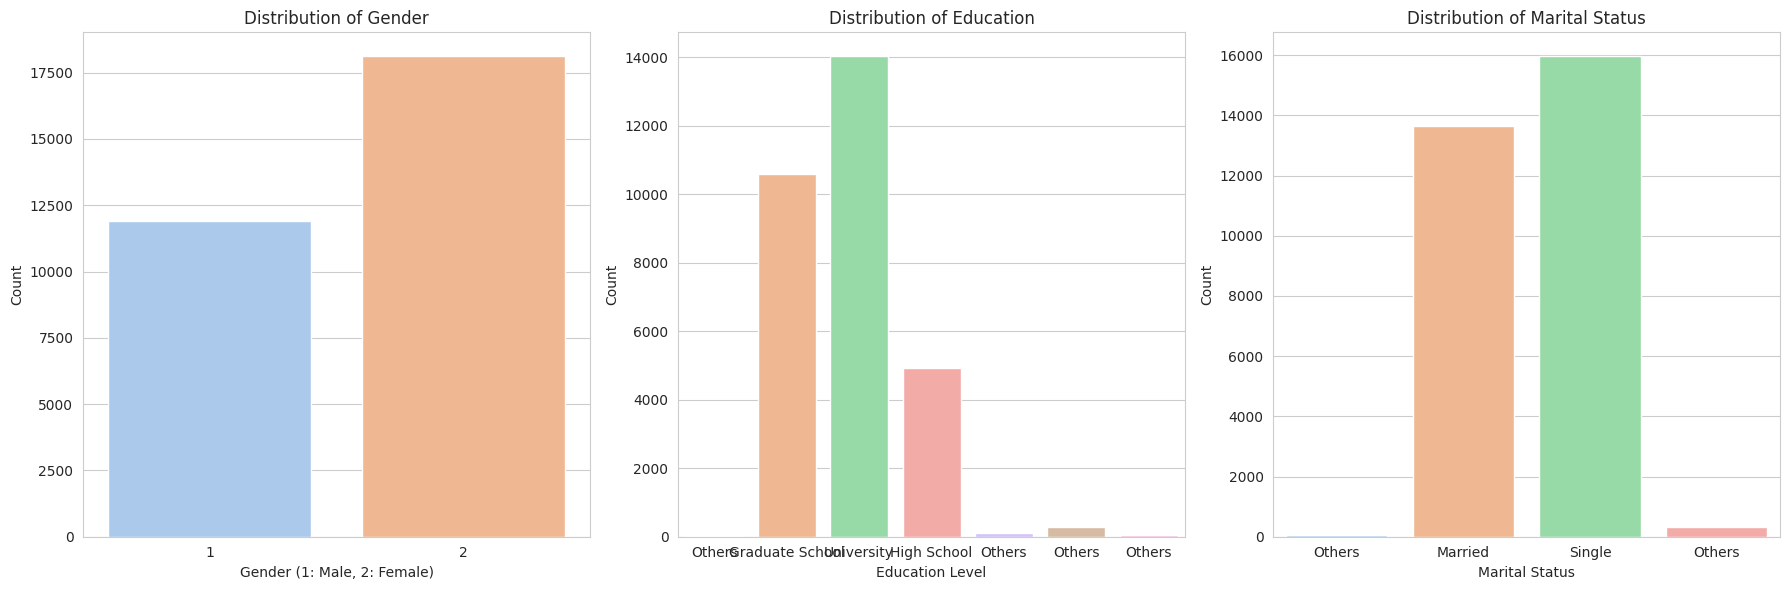

In [16]:
# Distribution of categorical variables: SEX, EDUCATION, MARRIAGE

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Distribution of SEX
sns.countplot(data=data, x='SEX', ax=ax[0], palette='pastel')
ax[0].set_title('Distribution of Gender')
ax[0].set_xlabel('Gender (1: Male, 2: Female)')
ax[0].set_ylabel('Count')

# Distribution of EDUCATION
sns.countplot(data=data, x='EDUCATION', ax=ax[1], palette='pastel')
ax[1].set_title('Distribution of Education')
ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_xticklabels(['Others', 'Graduate School', 'University', 'High School', 'Others', 'Others', 'Others'])

# Distribution of MARRIAGE
sns.countplot(data=data, x='MARRIAGE', ax=ax[2], palette='pastel')
ax[2].set_title('Distribution of Marital Status')
ax[2].set_xlabel('Marital Status')
ax[2].set_ylabel('Count')
ax[2].set_xticklabels(['Others', 'Married', 'Single', 'Others'])

plt.tight_layout()
plt.show()


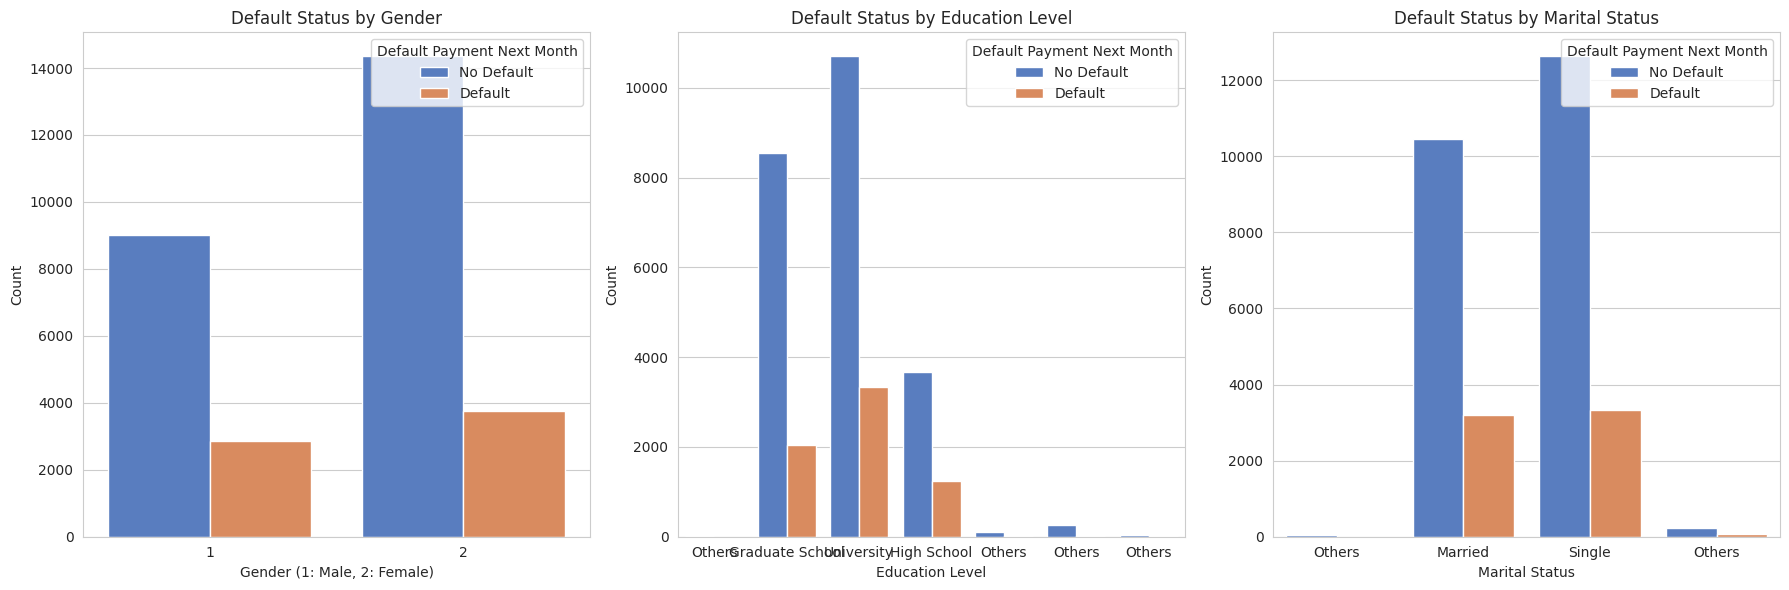

In [17]:
# Relationship between default status and other categorical variables: SEX, EDUCATION, MARRIAGE

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Relationship with SEX
sns.countplot(data=data, x='SEX', hue='default payment next month', ax=ax[0], palette='muted')
ax[0].set_title('Default Status by Gender')
ax[0].set_xlabel('Gender (1: Male, 2: Female)')
ax[0].set_ylabel('Count')
ax[0].legend(title='Default Payment Next Month', loc='upper right', labels=['No Default', 'Default'])

# Relationship with EDUCATION
sns.countplot(data=data, x='EDUCATION', hue='default payment next month', ax=ax[1], palette='muted')
ax[1].set_title('Default Status by Education Level')
ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].legend(title='Default Payment Next Month', loc='upper right', labels=['No Default', 'Default'])
ax[1].set_xticklabels(['Others', 'Graduate School', 'University', 'High School', 'Others', 'Others', 'Others'])

# Relationship with MARRIAGE
sns.countplot(data=data, x='MARRIAGE', hue='default payment next month', ax=ax[2], palette='muted')
ax[2].set_title('Default Status by Marital Status')
ax[2].set_xlabel('Marital Status')
ax[2].set_ylabel('Count')
ax[2].legend(title='Default Payment Next Month', loc='upper right', labels=['No Default', 'Default'])
ax[2].set_xticklabels(['Others', 'Married', 'Single', 'Others'])

plt.tight_layout()
plt.show()


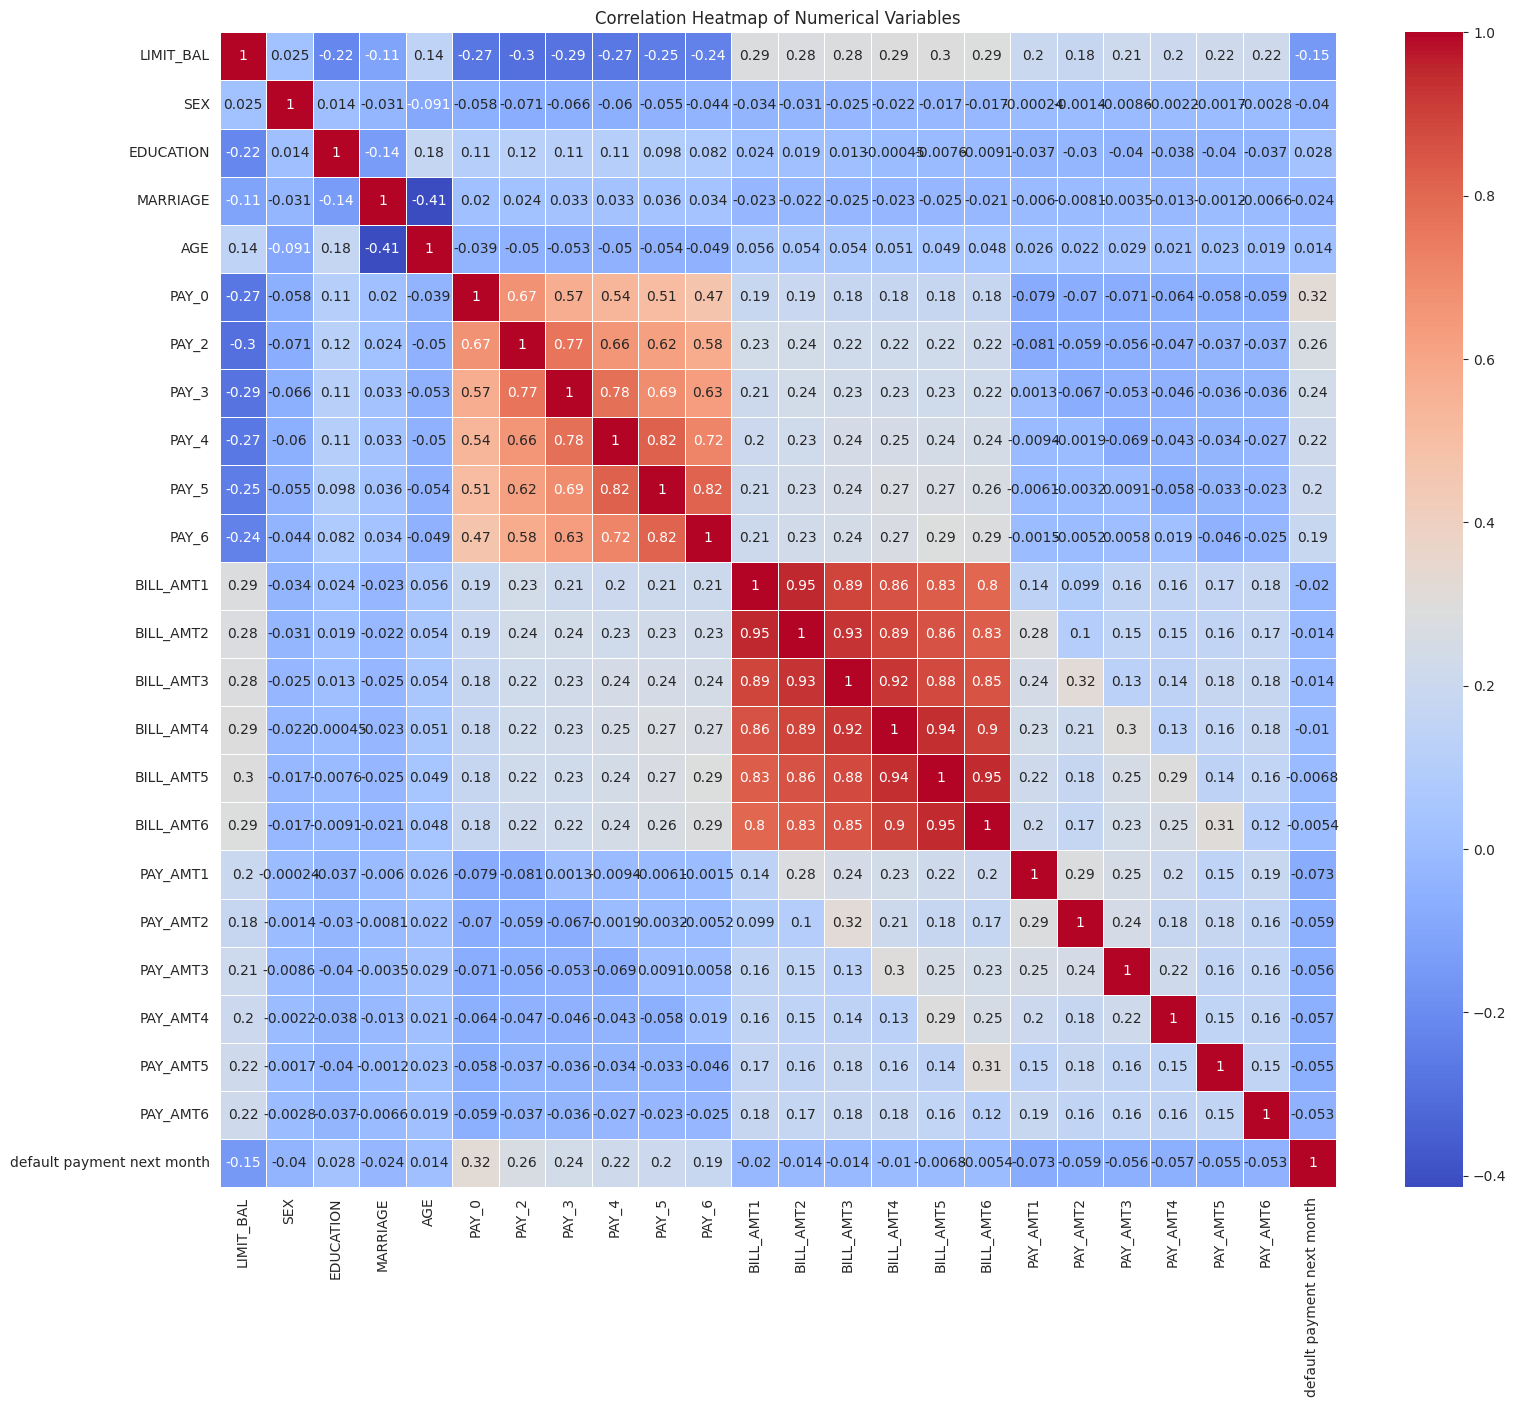

In [18]:
# Correlation heatmap of numerical variables
correlation_matrix = data.drop('ID', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


#Preprocessing Data

## Handling Missing Values

In [19]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Filter out columns with missing values for display
missing_values = missing_values[missing_values > 0]

missing_values


Series([], dtype: int64)

## Feature Engineering

**AVG_PAY_DELAY:** Average payment delay over the past six months.

**TOTAL_BILL_AMT:** Total bill amount over the past six months.

**TOTAL_PAY_AMT:** Total payment amount over the past six months.

**UTILIZATION_RATIO:** Ratio of total bill amount to the credit limit.

In [20]:
# Feature Engineering

# 1. Average Payment Delay
data['AVG_PAY_DELAY'] = data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

# 2. Total Bill Amount
data['TOTAL_BILL_AMT'] = data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)

# 3. Total Payment Amount
data['TOTAL_PAY_AMT'] = data[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

# 4. Utilization Ratio
data['UTILIZATION_RATIO'] = data['TOTAL_BILL_AMT'] / data['LIMIT_BAL']

# Display the first few rows of the dataset to check the new features
data[['AVG_PAY_DELAY', 'TOTAL_BILL_AMT', 'TOTAL_PAY_AMT', 'UTILIZATION_RATIO']].head()


,AVG_PAY_DELAY,TOTAL_BILL_AMT,TOTAL_PAY_AMT,UTILIZATION_RATIO
0,-0.333333,7704,689,0.385200
1,0.500000,17077,5000,0.142308
2,0.000000,101653,11018,1.129478
3,0.000000,231334,8388,4.626680
4,-0.333333,109339,59049,2.186780


## Catagorical Variable Encoding
One Hot Encoding variables including Sex, Education, and Marriage

In [21]:
# One-Hot Encoding for Categorical Variables

# Encoding SEX
data = pd.concat([data, pd.get_dummies(data['SEX'], prefix='SEX')], axis=1)

# Encoding EDUCATION
data = pd.concat([data, pd.get_dummies(data['EDUCATION'], prefix='EDUCATION')], axis=1)

# Encoding MARRIAGE
data = pd.concat([data, pd.get_dummies(data['MARRIAGE'], prefix='MARRIAGE')], axis=1)

# Drop the original categorical columns
data.drop(['SEX', 'EDUCATION', 'MARRIAGE'], axis=1, inplace=True)

# Display the first few rows of the dataset to check the encoded features
data.head()


,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,1,0,0,0,0,0,1,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,0,1,0,0,0,0,0,0,1,0
2,3,90000,34,0,0,0,0,0,0,29239,...,0,1,0,0,0,0,0,0,1,0
3,4,50000,37,0,0,0,0,0,0,46990,...,0,1,0,0,0,0,0,1,0,0
4,5,50000,57,-1,0,-1,0,0,0,8617,...,0,1,0,0,0,0,0,1,0,0


## Train Test Split + Scaling/Normalizing Data

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into training and testing sets
X = data.drop(columns=['default payment next month', 'ID'])
y = data['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((21000, 37), (9000, 37))

**Training set:** 21,000 samples

**Testing set:** 9,000 samples

Each sample has 37 features post encoding and feature engineering.

#Model Building

##Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = logreg_model.predict(X_test_scaled)

# Calculate accuracy and ROC AUC score
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Detailed classification report
report = classification_report(y_test, y_pred)

accuracy, roc_auc, report


(0.8094444444444444,
 0.6018929730983302,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.97      0.89      7040\n           1       0.68      0.23      0.35      1960\n\n    accuracy                           0.81      9000\n   macro avg       0.75      0.60      0.62      9000\nweighted avg       0.79      0.81      0.77      9000\n')

##Dataset Rebalancing

In [24]:
# Initialize and train the Logistic Regression model with class_weight='balanced'
logreg_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg_balanced.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_balanced = logreg_balanced.predict(X_test_scaled)

# Calculate accuracy and ROC AUC score for the balanced model
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
roc_auc_balanced = roc_auc_score(y_test, y_pred_balanced)

# Detailed classification report for the balanced model
report_balanced = classification_report(y_test, y_pred_balanced)

accuracy_balanced, roc_auc_balanced, report_balanced


(0.6953333333333334,
 0.6751116071428571,
 '              precision    recall  f1-score   support\n\n           0       0.88      0.71      0.78      7040\n           1       0.38      0.64      0.48      1960\n\n    accuracy                           0.70      9000\n   macro avg       0.63      0.68      0.63      9000\nweighted avg       0.77      0.70      0.72      9000\n')

## Random Forest Classifier Model

In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model with class_weight='balanced'
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate accuracy and ROC AUC score for the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

# Detailed classification report for the Random Forest model
report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, roc_auc_rf, report_rf


(0.8135555555555556,
 0.6420729939703154,
 '              precision    recall  f1-score   support\n\n           0       0.84      0.95      0.89      7040\n           1       0.64      0.34      0.44      1960\n\n    accuracy                           0.81      9000\n   macro avg       0.74      0.64      0.66      9000\nweighted avg       0.79      0.81      0.79      9000\n')

##XG-Boost Model

In [26]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(scale_pos_weight=(len(y_train) - y_train.sum()) / y_train.sum(),
                              eval_metric='logloss', use_label_encoder=False, random_state=42, n_jobs=-1)
xgb_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Calculate accuracy and ROC AUC score for the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)

# Detailed classification report for the XGBoost model
report_xgb = classification_report(y_test, y_pred_xgb)

accuracy_xgb, roc_auc_xgb, report_xgb


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


(0.7634444444444445,
 0.6967431006493507,
 '              precision    recall  f1-score   support\n\n           0       0.87      0.81      0.84      7040\n           1       0.47      0.58      0.52      1960\n\n    accuracy                           0.76      9000\n   macro avg       0.67      0.70      0.68      9000\nweighted avg       0.79      0.76      0.77      9000\n')